# Tutorial #1
An introduction to working with Metrica Sport's player tracking and event data. Options for visualising the data, and using tracking data to add context to shot maps and passing maps.

https://www.youtube.com/watch?v=8TrleFklEsE

https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking

This tutorial will use code from:
- `Lesson4.py` (hopefully renamed because not in repo)
- `Metrica_IO.py` (in/out):
    Some pre-propressing to get data in format we need for further analysis
- `Metrica_Viz.py` functions to help us plot the data


In [4]:
import sys  
sys.path.insert(0, '/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data')

import Metrica_IO as mio
import Metrica_Viz as mviz

In [5]:
#path to data
DATADIR = "/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data"
game_id = 2 # let's look at sample match 2

In [6]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [36]:
events.head(10)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
5,Away,PASS,NaN,1,395,15.80,423,16.92,Player16,Player15,-25.44,-10.88,-24.38,-27.88
6,Away,BALL LOST,INTERCEPTION,1,451,18.04,504,20.16,Player15,NaN,-25.44,-28.56,14.84,-29.24
7,Away,CHALLENGE,GROUND-LOST,1,504,20.16,504,20.16,Player23,NaN,11.66,-29.24,NaN,NaN
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN


In [8]:
events.shape

(1935, 14)

In [9]:
events.tail()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN
1934,Home,BALL OUT,CLEARANCE,2,140265,5610.60,140298,5611.92,Player12,NaN,0.33,0.16,0.41,-0.04


In [10]:
# count the number of each event type in the data
print( events['Type'].value_counts() )

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64


## Note - the positions are all between 0 & 1
This is because of the metrica coord sys is as shown below:

*there is a small correction in the image directly below in that the origin is actually located on the top left*

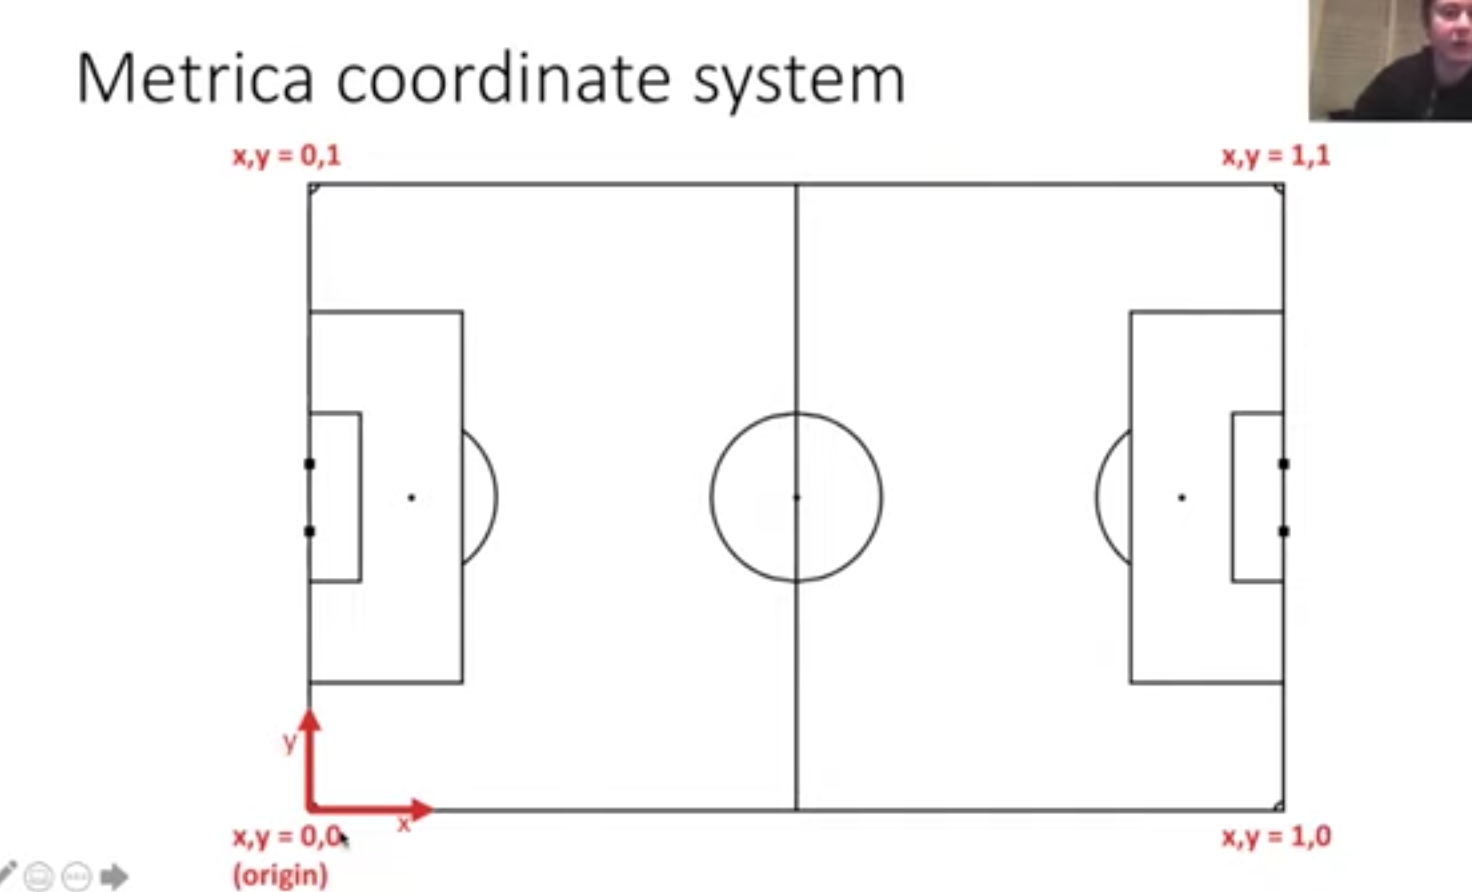

## Want to switch the coordinates

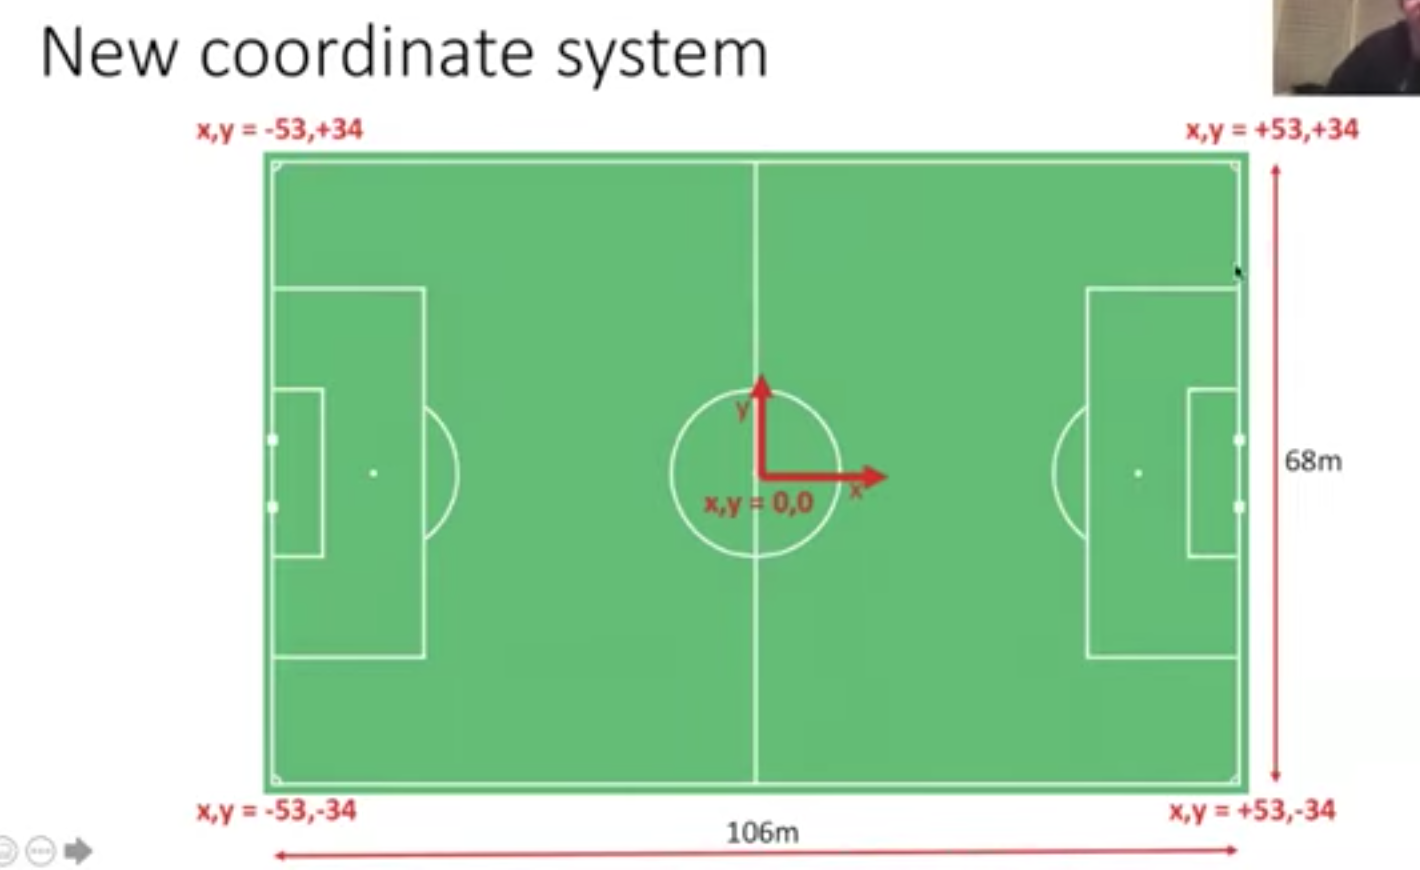

This is done via the "to_metric_coordinates"

**NOTE** This may need to be adjusted for new kinds of data sources, depending on how the original coordinate system is represented

In [11]:
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

In [12]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


## Now you can see the coordinates make a lot more intuitive sense

In [13]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

In [14]:
# Frequency of each event type by team
home_events['Type'].value_counts()


PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

In [15]:
away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64

In [16]:
# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']


In [17]:
# Look at frequency of each shot Subtype
home_shots['Subtype'].value_counts()


ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [18]:
away_shots['Subtype'].value_counts()

OFF TARGET-OUT         3
BLOCKED                2
ON TARGET-SAVED        2
ON TARGET-GOAL         2
HEAD-OFF TARGET-OUT    1
OFF TARGET-HEAD-OUT    1
Name: Subtype, dtype: int64

In [19]:
# Look at the number of shots taken by each home player
print( home_shots['From'].value_counts() )

Player9     4
Player10    3
Player5     2
Player3     1
Player7     1
Player4     1
Player12    1
Name: From, dtype: int64


In [20]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()


In [21]:
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [22]:
# Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60.

## Can probably clean up the line below by not encoding the .loc[num] and using a var or ref

Text(-47.7, -3.400000000000003, '')

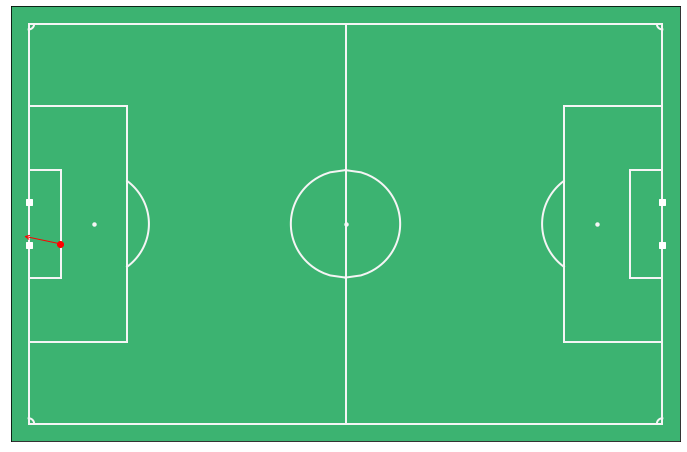

In [23]:
# Plot the first goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], xytext=events.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

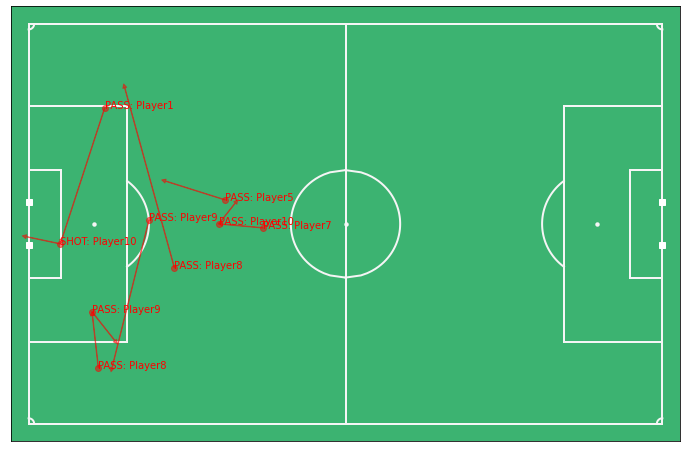

In [34]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[190:198], indicators = ['Marker','Arrow'],annotate=True)


In [25]:
#### TRACKING DATA ####

# READING IN TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')


Reading team: home
Reading team: away


In [26]:
# Look at the column namems
print( tracking_home.columns )

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


In [38]:
tracking_home.loc[50:55]

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
50,1,2.00,47.49012,0.70312,15.66574,15.60192,18.82878,5.01364,19.27292,-3.15860,...,0.05724,-10.43256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,1,2.04,47.47846,0.68952,15.67422,15.61892,18.82878,5.01160,19.23158,-3.14296,...,0.04876,-10.41896,NaN,NaN,NaN,NaN,NaN,NaN,0.22896,-0.25568
52,1,2.08,47.46574,0.67660,15.68482,15.63660,18.83090,5.01228,19.18706,-3.12936,...,0.03816,-10.40196,NaN,NaN,NaN,NaN,NaN,NaN,0.04240,-0.26112
53,1,2.12,47.45196,0.66300,15.69330,15.65496,18.83302,5.00684,19.14360,-3.11576,...,0.02650,-10.38360,NaN,NaN,NaN,NaN,NaN,NaN,-0.24380,-0.26996
54,1,2.16,47.44136,0.65348,15.70390,15.67876,18.83514,5.00888,19.10120,-3.10216,...,0.01166,-10.36796,NaN,NaN,NaN,NaN,NaN,NaN,-0.53000,-0.27880
55,1,2.20,47.43076,0.64668,15.71556,15.70256,18.83620,5.01160,19.05668,-3.09060,...,-0.00636,-10.34484,NaN,NaN,NaN,NaN,NaN,NaN,-0.81620,-0.28696


In [27]:
# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

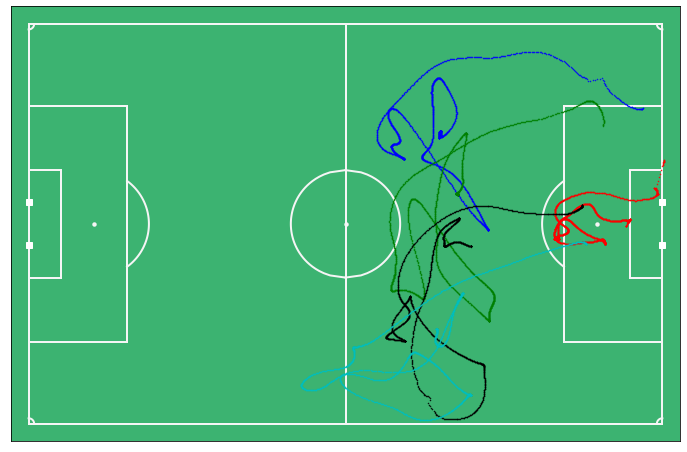

In [28]:
# Plot some player trajectories (players 11,1,2,3,4)
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', markersize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', markersize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', markersize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', markersize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', markersize=1)

You will notice the defenders all have similar trajectories - this is because they try to keep their formations and move around as a block.

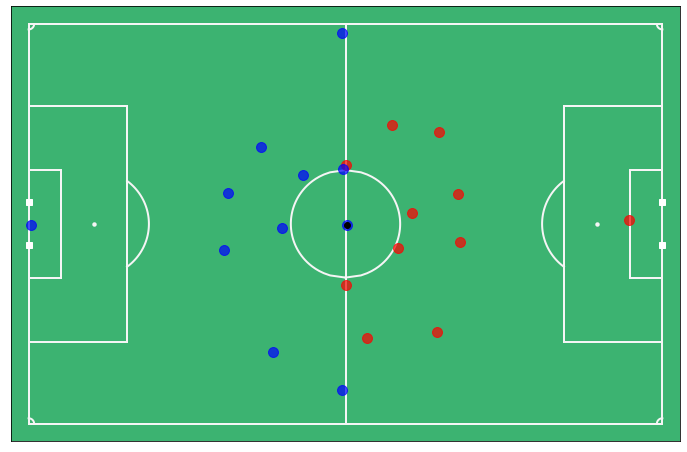

In [29]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame(tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame])

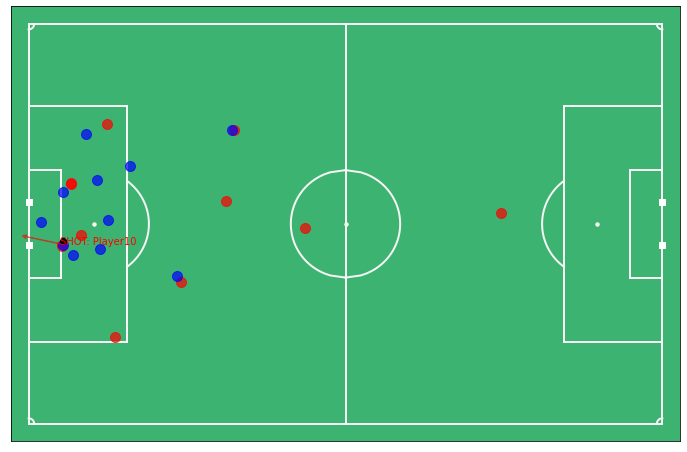

In [30]:
# PLOT POISTIONS AT GOAL
fig,ax = mviz.plot_events( events.loc[198:198], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[198]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

# END 

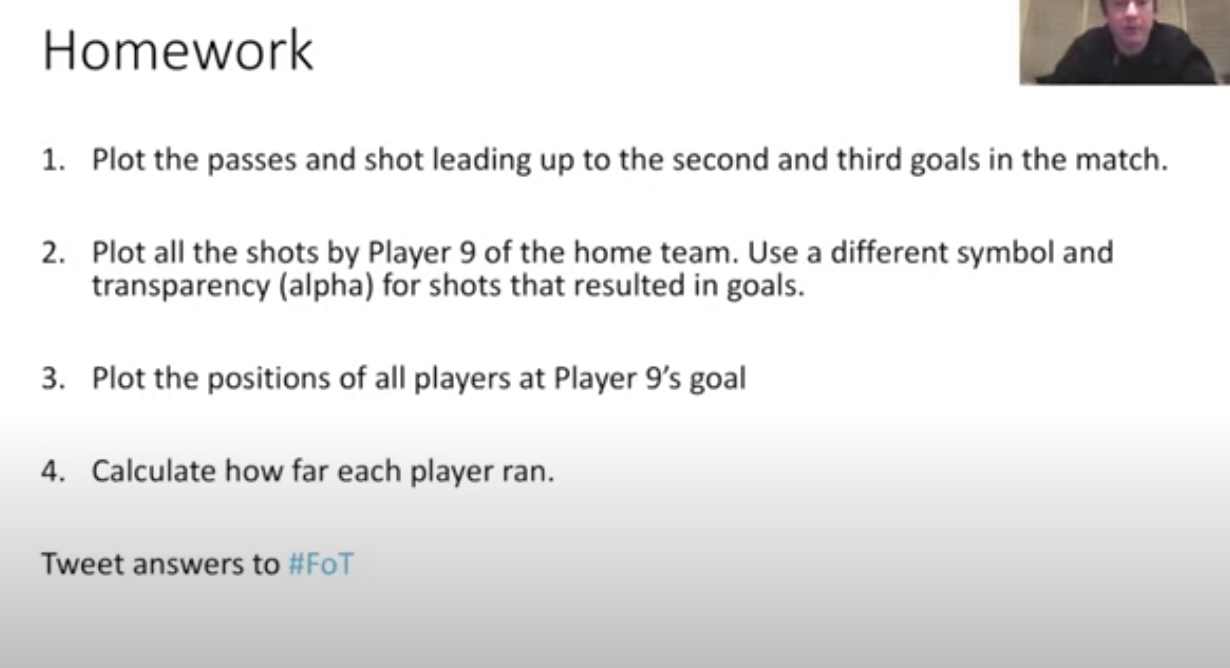